In [97]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import re

plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Read in the data

In [98]:
df = pd.read_csv('listings_september.csv')

### Data frame details

In [4]:
#check out the dimensions of the dataframe
df.shape

(7776, 96)

In [5]:
# scan the head of the dataframe
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20180914083817,2018-09-14,Hyde Park-Walk to UChicago or Theological Semi...,"As the sole guest in my quiet, vintage (1924) ...","The spacious bedroom has a queen size bed, che...","As the sole guest in my quiet, vintage (1924) ...",none,My building is located one block from beautifu...,...,t,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,1,2.94
1,4505,https://www.airbnb.com/rooms/4505,20180914083817,2018-09-14,1 Great Apartment. 352 Great Reviews. 1 bad one.,Across the street from CTA train. Runs every 6...,"We travel a lot, we know what people need. We...",Across the street from CTA train. Runs every 6...,none,NaN,...,t,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,1,3.09
2,6715,https://www.airbnb.com/rooms/6715,20180914083817,2018-09-14,Lincoln Park Oasis - Unit 2 ONLY,Unit 1 & Unit 2 are rented separately. They ca...,License #: (Phone number hidden by Airbnb) Be...,Unit 1 & Unit 2 are rented separately. They ca...,none,Things To Do & Close to: - An awesome Children...,...,t,2114275,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,2,0.82
3,7126,https://www.airbnb.com/rooms/7126,20180914083817,2018-09-14,Tiny Studio Apartment 94 Walk Score,NaN,This is a very small studio apartment with a ...,This is a very small studio apartment with a ...,none,"Ukrainian Village was just named ""Hottest Neig...",...,t,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,1,2.78
4,9811,https://www.airbnb.com/rooms/9811,20180914083817,2018-09-14,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,t,2079260,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,9,0.56


In [6]:
#Check the 
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 97 columns):
id                                  7776 non-null int64
listing_url                         7776 non-null object
scrape_id                           7776 non-null int64
last_scraped                        7776 non-null object
name                                7776 non-null object
summary                             7604 non-null object
space                               5983 non-null object
description                         7696 non-null object
experiences_offered                 7776 non-null object
neighborhood_overview               5524 non-null object
notes                               4127 non-null object
transit                             5699 non-null object
access                              5389 non-null object
interaction                         5140 non-null object
house_rules                         5439 non-null object
thumbnail_url                       0 no

In [75]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

### Clean zipcode

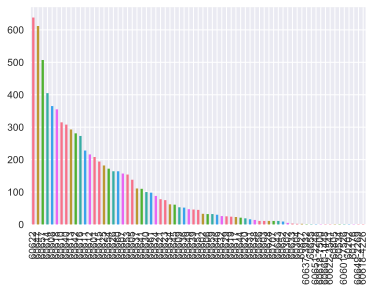

In [99]:
df['zipcode'].value_counts().plot(kind='bar');

In [100]:
df.zipcode.unique()

array(['60637', '60608', '60614', '60622', '60615', '60610', '60642',
       '60613', '60640', '60654', '60657', '60647', '60618', '60612',
       '60641', '60628', '60660', '60616', '60601', '60645', '60661',
       '60619', '60606', '60609', '60625', '60653', '60626', '60646',
       '60659', '60651', '60607', '60611', '60623', '60644', '60624',
       '60631', '60643', '60656', '60602', '60630', '60634', '60629',
       '60649', '60660-1448', nan, '60617', '60620', '60605', '60633',
       '60639', '60621', '60632', '60302', '60652', '60638', '60304',
       '60603', '60651-2248', '60707', '60618-4226', '60636',
       '60601-7526', '60649-2269', '60805', '60618-7500', '60827',
       '60655', '60622-3541', '60637-3932', '60534', '60202', '60176'],
      dtype=object)

In [101]:
df['zipcode_clean'] = df['zipcode'].str[:5]
df.zipcode_clean.unique()

array(['60637', '60608', '60614', '60622', '60615', '60610', '60642',
       '60613', '60640', '60654', '60657', '60647', '60618', '60612',
       '60641', '60628', '60660', '60616', '60601', '60645', '60661',
       '60619', '60606', '60609', '60625', '60653', '60626', '60646',
       '60659', '60651', '60607', '60611', '60623', '60644', '60624',
       '60631', '60643', '60656', '60602', '60630', '60634', '60629',
       '60649', nan, '60617', '60620', '60605', '60633', '60639', '60621',
       '60632', '60302', '60652', '60638', '60304', '60603', '60707',
       '60636', '60805', '60827', '60655', '60534', '60202', '60176'],
      dtype=object)

In [102]:
df['zipcode_clean'].describe()

count      7739
unique       63
top       60622
freq        639
Name: zipcode_clean, dtype: object

In [103]:
df['zipcode_clean'].value_counts()

60622    639
60647    612
60657    507
60614    405
60608    365
60618    357
60610    315
60640    308
60613    293
60642    281
60616    273
60611    228
60612    216
60601    209
60615    194
60625    182
60654    172
60660    165
60626    164
60607    157
60653    154
60605    138
60637    112
60641    110
60630    100
60661     98
60624     88
60621     78
60623     75
60634     62
        ... 
60649     48
60639     46
60651     46
60602     33
60659     32
60606     32
60646     30
60632     26
60629     25
60619     24
60617     23
60644     21
60620     19
60631     16
60638     14
60628     11
60643     11
60656     11
60603     11
60707     11
60652      9
60302      5
60633      3
60827      2
60304      2
60534      1
60202      1
60176      1
60655      1
60805      1
Name: zipcode_clean, Length: 63, dtype: int64

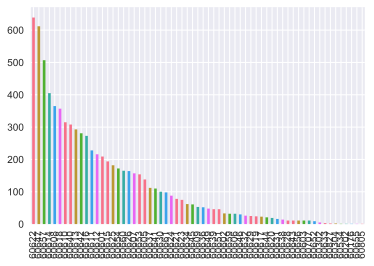

In [104]:
df['zipcode_clean'].value_counts().plot(kind='bar');

In [105]:
df['zipcode_clean'] = df['zipcode_clean'].astype('float')

In [106]:
df.rename(columns = {'zipcode' : 'zipcode_old','zipcode_clean': 'zipcode'}, inplace=True)

In [107]:
df['zipcode'].value_counts()

60622.0    639
60647.0    612
60657.0    507
60614.0    405
60608.0    365
60618.0    357
60610.0    315
60640.0    308
60613.0    293
60642.0    281
60616.0    273
60611.0    228
60612.0    216
60601.0    209
60615.0    194
60625.0    182
60654.0    172
60660.0    165
60626.0    164
60607.0    157
60653.0    154
60605.0    138
60637.0    112
60641.0    110
60630.0    100
60661.0     98
60624.0     88
60621.0     78
60623.0     75
60634.0     62
          ... 
60649.0     48
60639.0     46
60651.0     46
60602.0     33
60606.0     32
60659.0     32
60646.0     30
60632.0     26
60629.0     25
60619.0     24
60617.0     23
60644.0     21
60620.0     19
60631.0     16
60638.0     14
60603.0     11
60707.0     11
60643.0     11
60656.0     11
60628.0     11
60652.0      9
60302.0      5
60633.0      3
60827.0      2
60304.0      2
60655.0      1
60176.0      1
60202.0      1
60805.0      1
60534.0      1
Name: zipcode, Length: 63, dtype: int64

### Clean Price 

In [242]:
def clean_price(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe (df)
    and convert price objects into int64.
    '''
    
    for column in list_of_columns:
        dataframe[column] = dataframe[column].str[1:]
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').fillna(0)
        dataframe[column] = dataframe[column].astype('int64')
    return dataframe

In [243]:
df_clean2 = clean_price(df_clean2, ['price', 'security_deposit', 'cleaning_fee', 'extra_people'])

In [244]:
df_clean2.head()

,host_since,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,zvi,Number_of_days_as_host,number_of_amenities,review_period
0,2008-08-29,100%,t,1,1.0,1.0,1.0,"TV,Wifi,Kitchen,Breakfast,""Free street parking...",50,0,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,1.132704e+17,33,1311.0
1,2011-12-26,100%,f,3,NaN,1.0,1.0,"TV,""Smoking allowed""",48,0,...,10.0,10.0,8.0,10.0,f,flexible,1400,1.965600e+17,2,2275.0
2,2013-10-17,100%,t,3,1.0,1.0,1.0,"TV,Internet,Wifi,""Air conditioning"",Kitchen,""F...",59,0,...,10.0,10.0,9.0,10.0,f,moderate,1400,1.437696e+17,36,1664.0
3,2014-03-20,100%,f,6,1.5,3.0,3.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",165,0,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,1.281312e+17,22,1483.0
4,2014-03-20,100%,f,2,1.5,1.0,1.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",94,0,...,10.0,10.0,10.0,10.0,f,moderate,1400,1.236384e+17,18,1431.0


In [108]:
df.price.describe()

count        7776
unique        400
top       $150.00
freq          258
Name: price, dtype: object

In [109]:
df['price'] = df['price'].str[1:]
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
df.price.describe()

count    7776.000000
mean      133.124743
std       116.846076
min         0.000000
25%        60.000000
50%        99.000000
75%       160.000000
max       999.000000
Name: price, dtype: float64

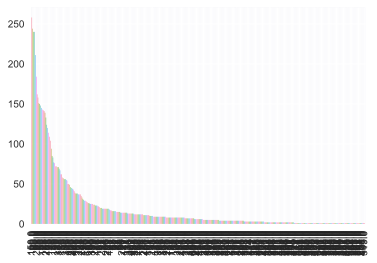

In [110]:
df['price'].value_counts().plot(kind='bar');

In [111]:
df['price'] = df['price'].astype(float)

#### alternate method 

have to try this!

In [77]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
'en_US.UTF8'
#money = "$6,150,593.22"
locale.atof(df.price.strip("$"))
6150593.2199999997

Error: unsupported locale setting

### Histograms

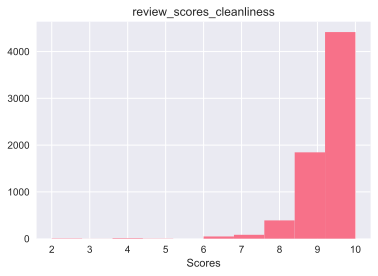

In [112]:
df.hist(column = 'review_scores_cleanliness');
plt.xlabel('Scores');

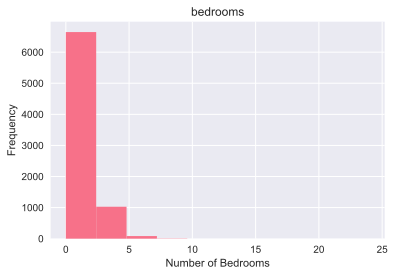

In [113]:
df.hist(column = 'bedrooms');
plt.xlabel('Number of Bedrooms');
plt.ylabel('Frequency');

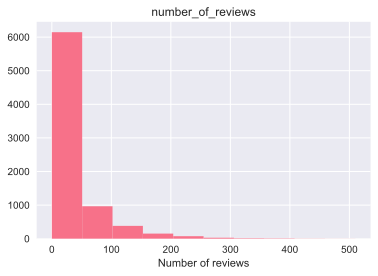

In [114]:
df.hist(column = 'number_of_reviews');
plt.xlabel('Number of reviews');

In [115]:
df['host_since'] = df['host_since'].astype('datetime64[ns]')

### Scatter Plot

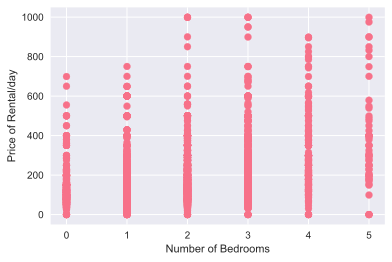

In [116]:
df_bedroom = df[df.bedrooms <=5]
df_bedroom.head()
plt.scatter(df_bedroom.bedrooms, df_bedroom.price);
plt.xlabel('Number of Bedrooms');
plt.ylabel('Price of Rental/day');

In [117]:
df_bedroom.groupby(['bedrooms']).agg({'price': 'median'})

,price
bedrooms,
0.0,100.0
1.0,70.0
2.0,145.0
3.0,180.0
4.0,250.0
5.0,308.0


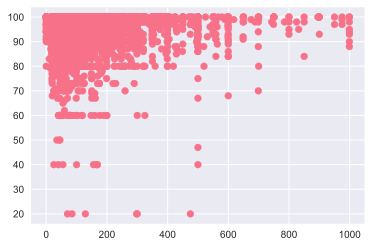

In [118]:
plt.scatter(df.price, df.review_scores_rating);

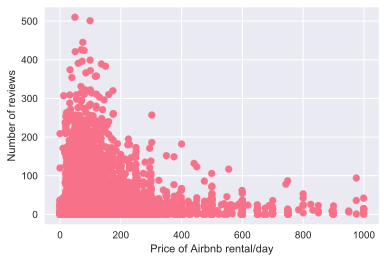

In [119]:
plt.scatter(df.price, df.number_of_reviews);
plt.xlabel('Price of Airbnb rental/day');
plt.ylabel('Number of reviews');

### Rent as a proxy for the location

In [40]:
df_rent = pd.read_csv("data/chicago-rent.csv")

In [42]:
df_rent.dtypes

zipcode    int64
zvi        int64
dtype: object

In [44]:
df_rent.head()

,zipcode,zvi
0,60601,1909
1,60602,1546
2,60603,1593
3,60604,1739
4,60605,1780


In [61]:
df_new = pd.merge(df, df_rent, on ='zipcode')

In [63]:
df_new.head()
df_new.shape

(7715, 98)

### More Clean ups

In [131]:
df_clean = df_new.drop(columns = ['listing_url','scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_thumbnail_url', 'host_acceptance_rate', 'host_picture_url', 'host_location', 'host_url', 'host_has_profile_pic', 'host_identity_verified', 'street','neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code','country', 'is_location_exact', 'square_feet', 'weekly_price', 'monthly_price', 'minimum_nights','maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_365', 'calendar_last_scraped','requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'require_guest_profile_picture','require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'])
df_clean.head()
df_clean.shape
df_clean.to_csv('clean_listings1.csv')

In [189]:
df_clean2 =df_clean.drop(columns =['id','name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes','transit', 'access', 'interaction', 'house_rules', 'host_id', 'host_name', 'host_about', 'host_response_time', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode_old','latitude','longitude','property_type','room_type', 'bed_type', 'zipcode'])
df_clean2.head()
df_clean2.shape
df_clean2.to_csv('clean_listing2.csv')

In [ ]:
df_clean3 = df_clean.drop(columns =['host_since', 'amenities','first_review', 'last review', 'zipcode']) 
df_clean3.head()
df_clean3.shape
df_clean3.to_csv('clean_listing3.csv')

In [190]:
df_clean2.dtypes

host_since                      object
host_response_rate              object
host_is_superhost               object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                       object
price                           object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
availability_60                  int64
availability_90                  int64
number_of_reviews                int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
is_business_travel_ready 

In [223]:
def make_datetime_object(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe (df)
    and convert date objects into datetime.
    '''
    
    for column in list_of_columns:
        dataframe[column] = pd.to_datetime(dataframe[column], format = '%m-%d-%Y', errors ='ignore')
        dataframe[column] = dataframe[column].astype('datetime64')
    return dataframe

In [249]:
df_clean2 = make_datetime_object(df_clean2, ['host_since', 'first_review', 'last_review', 'now'])
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 7714
Data columns (total 32 columns):
host_since                     7714 non-null datetime64[ns]
host_response_rate             6807 non-null object
host_is_superhost              7714 non-null object
accommodates                   7715 non-null int64
bathrooms                      7712 non-null float64
bedrooms                       7713 non-null float64
beds                           7712 non-null float64
amenities                      7715 non-null object
price                          7715 non-null int64
security_deposit               7715 non-null int64
cleaning_fee                   7715 non-null int64
guests_included                7715 non-null int64
extra_people                   7715 non-null int64
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
first_review                   6845 non-null datetime64[ns]

In [246]:
now = datetime.datetime.now().date()

print(now)

2018-10-09


In [241]:
df_clean2.head()
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 7714
Data columns (total 31 columns):
host_since                     7714 non-null datetime64[ns]
host_response_rate             6807 non-null object
host_is_superhost              7714 non-null object
accommodates                   7715 non-null int64
bathrooms                      7712 non-null float64
bedrooms                       7713 non-null float64
beds                           7712 non-null float64
amenities                      7715 non-null object
price                          7715 non-null object
security_deposit               5120 non-null object
cleaning_fee                   6380 non-null object
guests_included                7715 non-null int64
extra_people                   7715 non-null object
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
first_review                   6845 non-null datetime64

In [231]:
df_clean2['review_period'] = (df_clean2['last_review'] - df_clean2['first_review']).astype('timedelta64[D]')

In [247]:
df_clean2['now'] = now

In [250]:
df_clean2['Number_of_days_as_host'] = (df_clean2['now'] - df_clean2['host_since']).astype('timedelta64[D]')

In [232]:
df_clean2.head()

,host_since,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,zvi,Number_of_days_as_host,number_of_amenities,review_period
0,2008-08-29,100%,t,1,1.0,1.0,1.0,"TV,Wifi,Kitchen,Breakfast,""Free street parking...",$50.00,$0.00,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,1.132704e+17,33,1311.0
1,2011-12-26,100%,f,3,NaN,1.0,1.0,"TV,""Smoking allowed""",$48.00,NaN,...,10.0,10.0,8.0,10.0,f,flexible,1400,1.965600e+17,2,2275.0
2,2013-10-17,100%,t,3,1.0,1.0,1.0,"TV,Internet,Wifi,""Air conditioning"",Kitchen,""F...",$59.00,NaN,...,10.0,10.0,9.0,10.0,f,moderate,1400,1.437696e+17,36,1664.0
3,2014-03-20,100%,f,6,1.5,3.0,3.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",$165.00,$0.00,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,1.281312e+17,22,1483.0
4,2014-03-20,100%,f,2,1.5,1.0,1.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",$94.00,$0.00,...,10.0,10.0,10.0,10.0,f,moderate,1400,1.236384e+17,18,1431.0


### fill empty cells with 0

In [267]:
def recode_empty_cells(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe 
    and replace the empty cells with 0.
    '''

    for column in list_of_columns:
        dataframe[column] = dataframe[column].replace("", np.nan)
        #dataframe[column] = dataframe[column].fillna(0)

    return dataframe

In [269]:
df_clean3 = recode_empty_cells(df_clean3, ['host_response_rate', 'host_is_superhost', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_business_travel_ready',
       'cancellation_policy', 'zvi', 'Number_of_days_as_host',
       'number_of_amenities', 'review_period'])

In [272]:
df_clean3.head()

,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,zvi,Number_of_days_as_host,number_of_amenities,review_period
0,100,t,1,1.0,1.0,1.0,50,0,20,1,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,3693.0,33,1311.0
1,100,f,3,0.0,1.0,1.0,48,0,0,1,...,10.0,10.0,8.0,10.0,f,flexible,1400,2479.0,2,2275.0
2,100,t,3,1.0,1.0,1.0,59,0,0,2,...,10.0,10.0,9.0,10.0,f,moderate,1400,1818.0,36,1664.0
3,100,f,6,1.5,3.0,3.0,165,0,30,4,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,1664.0,22,1483.0
4,100,f,2,1.5,1.0,1.0,94,0,15,1,...,10.0,10.0,10.0,10.0,f,moderate,1400,1664.0,18,1431.0


In [271]:
df_clean3 = df_clean3.fillna(0)

### Amenities

In [192]:
def clean_amenities(dataframe):
    
    dataframe['amenities'] = [value[1:-1] for value in dataframe['amenities']]
    dataframe['number_of_amenities'] = [len(value.split(',')) for value in dataframe['amenities']]
    
    return dataframe  

In [220]:
df_clean2 = clean_amenities(df_clean2)

In [221]:
df_clean2.head()

,host_since,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,zvi,Number_of_days_as_host,number_of_amenities
0,2008-08-29,100%,t,1,1.0,1.0,1.0,"TV,Wifi,Kitchen,Breakfast,""Free street parking...",$50.00,$0.00,...,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,<function <listcomp>.<lambda> at 0x1a20363d90>,33
1,2011-12-26,100%,f,3,NaN,1.0,1.0,"TV,""Smoking allowed""",$48.00,NaN,...,9.0,10.0,10.0,8.0,10.0,f,flexible,1400,<function <listcomp>.<lambda> at 0x1a22868f28>,2
2,2013-10-17,100%,t,3,1.0,1.0,1.0,"TV,Internet,Wifi,""Air conditioning"",Kitchen,""F...",$59.00,NaN,...,10.0,10.0,10.0,9.0,10.0,f,moderate,1400,<function <listcomp>.<lambda> at 0x1a22868c80>,36
3,2014-03-20,100%,f,6,1.5,3.0,3.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",$165.00,$0.00,...,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,<function <listcomp>.<lambda> at 0x1a22868158>,22
4,2014-03-20,100%,f,2,1.5,1.0,1.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",$94.00,$0.00,...,10.0,10.0,10.0,10.0,10.0,f,moderate,1400,<function <listcomp>.<lambda> at 0x1a22868a60>,18


In [161]:
df2 = df.copy()

In [162]:
df2 = remove_amenities_brackets(df2)

In [171]:
df2.amenities[0]

'TV,Wifi,Kitchen,Breakfast,"Free street parking",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self check-in",Lockbox,"Hot water","Bed linens","Extra pillows and blankets","Ethernet connection",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Stove,"Long term stays allowed","Cleaning before checkout"'

In [165]:
df2['number_of_amenities'] = [len(value.split(',')) for value in df2['amenities']]

In [176]:
import re
stopwords = re.compile(r'translation missing: en.hosting_amenity_[0-9]+$')
df2['amenities'][0] = [word for word in df['amenities'][0] if word not in stopwords]


TypeError: argument of type '_sre.SRE_Pattern' is not iterable

In [173]:
query = 'What is hello'
stopwords = ['what','who','is','a','at','is','he']
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

print(result)

hello


In [174]:
result1 = ' '.join(filter(lambda x: x.lower() not in stopwords,  query.split()))
result1

'hello'

In [167]:
df2.number_of_amenities.head(5)

0    33
1    44
2    25
3    24
4    23
Name: number_of_amenities, dtype: int64

In [252]:
df_clean2['host_response_rate'] = df_clean2['host_response_rate'].str[:-1]

In [253]:
df_clean2.head()

,host_since,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,...,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,zvi,Number_of_days_as_host,number_of_amenities,review_period,now
0,2008-08-29,100,t,1,1.0,1.0,1.0,"TV,Wifi,Kitchen,Breakfast,""Free street parking...",50,0,...,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,3693.0,33,1311.0,2018-10-09
1,2011-12-26,100,f,3,NaN,1.0,1.0,"TV,""Smoking allowed""",48,0,...,10.0,8.0,10.0,f,flexible,1400,2479.0,2,2275.0,2018-10-09
2,2013-10-17,100,t,3,1.0,1.0,1.0,"TV,Internet,Wifi,""Air conditioning"",Kitchen,""F...",59,0,...,10.0,9.0,10.0,f,moderate,1400,1818.0,36,1664.0,2018-10-09
3,2014-03-20,100,f,6,1.5,3.0,3.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",165,0,...,10.0,10.0,10.0,f,strict_14_with_grace_period,1400,1664.0,22,1483.0,2018-10-09
4,2014-03-20,100,f,2,1.5,1.0,1.0,"Internet,Wifi,""Air conditioning"",Kitchen,""Pets...",94,0,...,10.0,10.0,10.0,f,moderate,1400,1664.0,18,1431.0,2018-10-09


In [266]:
df_clean3 = df_clean2.drop(columns =['host_since', 'amenities','first_review', 'last_review','now']) 
df_clean3.head()
df_clean3.shape


(7715, 27)

In [273]:
df_clean3.to_csv('clean_listing3.csv')

In [275]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 7714
Data columns (total 27 columns):
host_response_rate             7715 non-null object
host_is_superhost              7715 non-null object
accommodates                   7715 non-null int64
bathrooms                      7715 non-null float64
bedrooms                       7715 non-null float64
beds                           7715 non-null float64
price                          7715 non-null int64
security_deposit               7715 non-null int64
cleaning_fee                   7715 non-null int64
guests_included                7715 non-null int64
extra_people                   7715 non-null int64
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
review_scores_rating           7715 non-null float64
review_scores_accuracy         7715 non-null float64
review_scores_cleanliness      7715 non-null float64
review_score

### get_dummies

In [278]:
X = pd.get_dummies(df_clean3.host_is_superhost, drop_first=True)

In [279]:
X.head()

,f,t
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [286]:
Y=pd.get_dummies(df_clean3.cancellation_policy, drop_first=True)

In [287]:
Y.head()

,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
0,0,0,1,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [288]:
df_clean4 = df_clean3.join(X)

In [289]:
df_clean4 = df_clean4.join(Y)

In [291]:
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 7714
Data columns (total 34 columns):
host_response_rate             7715 non-null object
host_is_superhost              7715 non-null object
accommodates                   7715 non-null int64
bathrooms                      7715 non-null float64
bedrooms                       7715 non-null float64
beds                           7715 non-null float64
price                          7715 non-null int64
security_deposit               7715 non-null int64
cleaning_fee                   7715 non-null int64
guests_included                7715 non-null int64
extra_people                   7715 non-null int64
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
review_scores_rating           7715 non-null float64
review_scores_accuracy         7715 non-null float64
review_scores_cleanliness      7715 non-null float64
review_score

In [292]:
df_clean4 = df_clean4.drop(columns =['is_business_travel_ready', 'cancellation_policy','host_is_superhost'])

In [293]:
df_clean4['host_response_rate'] = df_clean4['host_response_rate'].astype('int64')

In [296]:
#df_clean4.info()
df_clean4.to_csv('listing_final.csv')


### Walk Score

In [64]:
walk_score = pd.read_csv('data/walk_score.csv')

In [65]:
walk_score.head()

,Unnamed: 0,Rank#,Name,Walk Score,Transit Score,Bike Score,Population
0,0,1,Near North Side,96,90,87,85347
1,1,2,West Loop,96,100,85,6097
2,2,3,East Ukrainian Village,96,75,98,7233
3,3,4,Ukrainian Village,94,70,97,6002
4,4,5,Wicker Park,94,75,95,8833


In [72]:
walk_score['Name'].unique()

array(['Near North Side', 'West Loop', 'East Ukrainian Village',
       'Ukrainian Village', 'Wicker Park', 'Lincoln Park', 'The Loop',
       'Grant Park', 'Fulton River District', 'Noble Square', 'DePaul',
       'South Loop', 'Bucktown', 'Lakeview', 'West Town', 'Uptown',
       'Ravenswood', 'Edgewater', 'North Center', 'Armour Square',
       'Pilsen', 'Logan Square', 'Roscoe Village', 'Albany Park',
       'Near West Side', 'Hyde Park', 'Rogers Park', 'Goose Island',
       'University Village - Little Italy', 'Irving Park', 'River West',
       'Humboldt Park', 'Avondale', 'East Hyde Park',
       'South Old Irving Park', 'Tri-Taylor', 'Cragin', 'Lincoln Square',
       'Mayfair', 'Little Village', 'Chatham', 'West Ridge',
       'Illinois Medical District', 'Bridgeport', 'Kilbourn Park',
       'Hermosa', 'Old Irving Park', 'Kenwood', 'Belmont Central',
       'North Mayfair', 'Belmont Gardens', 'East Garfield Park',
       'Chicago Lawn', 'Marynook', 'West Garfield Park',
    

In [67]:
df_new['neighbourhood_cleansed'].unique()

array(['Hyde Park', 'Woodlawn', 'South Shore', 'Washington Park',
       'Greater Grand Crossing', 'South Lawndale', 'Lower West Side',
       'Near West Side', 'Bridgeport', 'North Lawndale', 'Mckinley Park',
       'Lincoln Park', 'Lake View', 'Logan Square', 'Uptown',
       'Near North Side', 'West Town', 'Humboldt Park', 'Kenwood',
       'Grand Boulevard', 'Lincoln Square', 'North Center', 'Edgewater',
       'Avondale', 'Hermosa', 'Irving Park', 'Albany Park',
       'East Garfield Park', 'Portage Park', 'Belmont Cragin', 'Pullman',
       'Washington Heights', 'Roseland', 'West Pullman', 'Rogers Park',
       'West Ridge', 'Near South Side', 'Armour Square', 'Douglas',
       'Oakland', 'Loop', 'Chatham', 'Calumet Heights', 'Brighton Park',
       'New City', 'Fuller Park', 'North Park', 'Mount Greenwood',
       'Forest Glen', 'Norwood Park', 'Jefferson Park', 'Austin',
       'West Garfield Park', 'Edison Park', 'Beverly', 'Morgan Park',
       'Ohare', 'Dunning', 'Montclare'